<a href="https://colab.research.google.com/github/renerubio/book-analysis/blob/main/all_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segunda Parte: Análisis Cualitativo. Con nuestros datos
*   ¿Cuál fue el año en el que se publicaron más libros?
*   Muéstralo en un gráfico

Primero movemos el resultado del scraping a github para tenerlo disponible publicamente y la ejecución del notebook sea más ágil.
La exploración del fichero all_books.xlsx la hemos hecho en en propio excel por ser más fácil analizar los datos visualmente.

In [1]:
import pandas as pd

file_path = "https://github.com/renerubio/book-analysis/raw/refs/heads/main/all_books.xlsx"

df = pd.read_excel(file_path)

print(df.head(5))

                              book_id_title  book_id  \
0  1.Harry_Potter_and_the_Half_Blood_Prince        1   
1                10.Harry_Potter_Collection       10   
2                          10009.Homo_Faber    10009   
3             1001896.The_Real_Mother_Goose  1001896   
4                        100247.Vagabonding   100247   

                                     cover_image_uri  \
0  https://images-na.ssl-images-amazon.com/images...   
1  https://images-na.ssl-images-amazon.com/images...   
2  https://images-na.ssl-images-amazon.com/images...   
3  https://images-na.ssl-images-amazon.com/images...   
4  https://images-na.ssl-images-amazon.com/images...   

                                          book_title       book_series  \
0             Harry Potter and the Half-Blood Prince  ['Harry Potter']   
1                            Harry Potter Collection               NaN   
2                                         Homo Faber               NaN   
3                             

Durante el análisis hemos identificado algunos campos que necesitan transformación para contar el número de repeticiones de un año, por lo cual haremos algunas transformaciones con la característica "year_first_published"

In [2]:
# Convertir la columna a tipo numérico
df["year_first_published"] = pd.to_numeric(df["year_first_published"], errors="coerce")

# Eliminar valores nulos
df_cleaned = df.dropna(subset=["year_first_published"])

# Convertir a entero
df_cleaned["year_first_published"] = df_cleaned["year_first_published"].astype(int)


<ipython-input-2-44e4b29d81fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["year_first_published"] = df_cleaned["year_first_published"].astype(int)


Ya con los datos transformados, tenemos el contador de los años que más se repiten, en este caso es el año 2018 con 46 veces.

In [3]:
# Contar cuántos libros hay por año
year_counts = df_cleaned["year_first_published"].value_counts().sort_index()

# Mostrar los 5 años con más publicaciones
print(year_counts.sort_values(ascending=False).head(5))


year_first_published
2018    46
2017    41
1962    26
1961    23
2016    22
Name: count, dtype: int64


Para mostrarlo en un gráfico usaremos el de tipo barra, donde se aprecia que la barra de 2018 está primero, de una escala de los 10 años con más publicaciones.

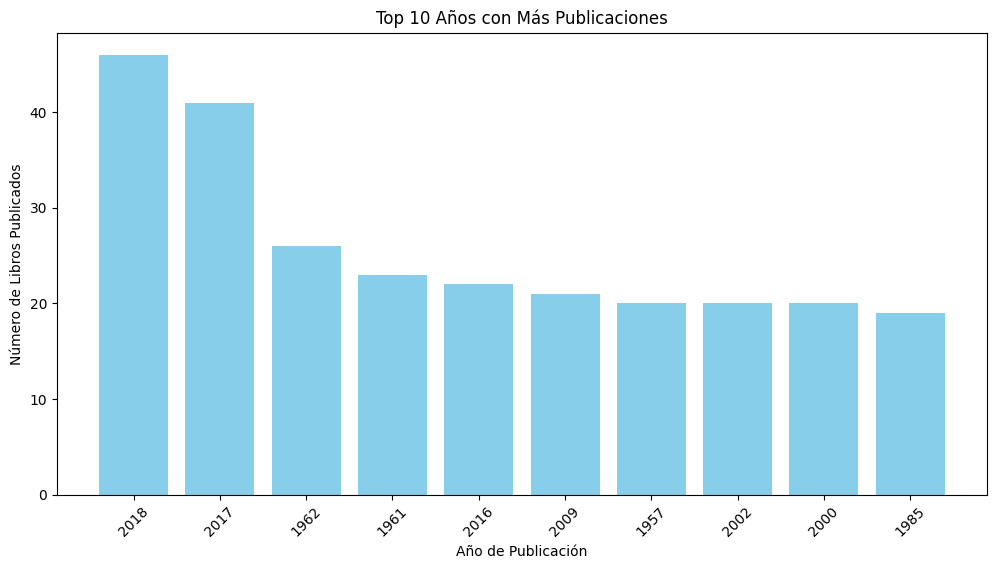

In [4]:
import matplotlib.pyplot as plt

# Obtener los 10 años con más publicaciones
top_10_years = year_counts.sort_values(ascending=False).head(10)

# Ordenar por número de publicaciones de mayor a menor
top_10_years = top_10_years.sort_values(ascending=False)

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.bar(top_10_years.index.astype(str), top_10_years.values, color="skyblue")

plt.xlabel("Año de Publicación")
plt.ylabel("Número de Libros Publicados")
plt.title("Top 10 Años con Más Publicaciones")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor lectura

plt.show()



* ¿Y el autor más prolífico?
* ¿Cuántos libros suyos hay en el dataset?




Para responder a ¿Cuál es el autor más prolífico? vamos a contar la cantidad de repeticones por autor, luego nos quedaremos con el identificador del autor que más se repite y obtendremos el valor de máximo de repeticiones.

In [5]:
# Contar la cantidad de libros por autor (la cantidad de repeticiones por autor)
author_counts = df_cleaned["author"].value_counts()

# Obtener el autor con más libros (el autor que más se repite)
most_prolific_author = author_counts.idxmax()
# y la cantidad de libros que tiene (cuantas veces se repite el autor)
num_books_by_author = author_counts.max()

# Mostrar el resultado
print(f"El autor más prolífico es {most_prolific_author}, con un total de {num_books_by_author} libros.")

El autor más prolífico es Edgar Rice Burroughs, con un total de 38 libros.


# ¿Qué palabras clave o elementos están más asociados con las altas puntuaciones?

Para hacer este análisis, revisamos visualmente las características para ver si encontramos alguna relación entre las altas puntuaciones "average_rating" o "rating_distribution" y las demás características, en principio nos quedaremos con "average_rating" para el análisis ya que nos parece más representativa que usar uno o varios valores de "rating_distribution".  
Aquí nos ha llamado la atención la gente que ya lo ha leído "people_curr_read" y la gente que quiere leerlo "peop_want_to_read".
Decidimos hacer un análisis con estas características, sin embargo hemos descubierto que tienen valores numéricos expresados con por ejempl miles con "k" y milloes con "m", no hemos detectado otros literales de cantidades, así que hacemos la transformación para trabajar un análisis con estos valores.

In [6]:
# Función para convertir valores tipo "49.7k" a 49700 y "1m" a 1000000
def convert_to_numeric(value):
    if isinstance(value, str):  # Verifica si el valor es una cadena
        value = value.lower().replace(",", "").strip()  # Elimina comas y espacios extra
        if "k" in value:
            return float(value.replace("k", "")) * 1_000  # Convierte "k" a miles
        elif "m" in value:
            return float(value.replace("m", "")) * 1_000_000  # Convierte "m" a millones
    try:
        return int(value)  # convertir directamente a número
    except ValueError:
        return None  # Si falla, devuelve None (para identificar valores erróneos)

# Aplicar la función a las columnas en el DataFrame
df_cleaned["people_curr_read"] = df_cleaned["people_curr_read"].apply(convert_to_numeric)
df_cleaned["peop_want_to_read"] = df_cleaned["peop_want_to_read"].apply(convert_to_numeric)

# Verificar la conversión
print(df_cleaned[["people_curr_read", "peop_want_to_read"]].head())

   people_curr_read  peop_want_to_read
0           49700.0           567000.0
1             243.0             7253.0
2             671.0            14800.0
3             345.0             4300.0
4            1900.0            72400.0


<ipython-input-6-db73570b3e6d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["people_curr_read"] = df_cleaned["people_curr_read"].apply(convert_to_numeric)
<ipython-input-6-db73570b3e6d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["peop_want_to_read"] = df_cleaned["peop_want_to_read"].apply(convert_to_numeric)


Ahora después de la conversión vamos a revisar cuantos valores nulos tenemos

In [7]:
# Contar cuántos valores nulos que hay en las columnas "people_curr_read" y "peop_want_to_read"
none_counts = df_cleaned[["people_curr_read", "peop_want_to_read"]].isnull().sum()
print(none_counts)

people_curr_read     53
peop_want_to_read    53
dtype: int64


Vemos varios valores nulos, para intentar ser más precisos usaremos un modelo de regresión. Si "people_curr_read" y "peop_want_to_read" están correlacionados con "average_rating", podríamos predecir el valor más probable en vez de usar un criterio aleatorio como eliminarlos, o asignarles el valor de la media o mediana... Hemos preferido intentar ser un poco más precisos.

In [8]:
from sklearn.linear_model import LinearRegression

# Ver la correlación para confirmar que tiene sentido hacer la predicción
print(df_cleaned[["people_curr_read", "peop_want_to_read", "average_rating"]].corr())

# Filtrar datos completos (sin valores nulos)
df_complete = df_cleaned.dropna(subset=["people_curr_read", "peop_want_to_read", "average_rating"])

# Entrenar modelo para predecir "people_curr_read"
X = df_complete[["average_rating"]]
y = df_complete["people_curr_read"]

model_reading = LinearRegression()
model_reading.fit(X, y)

# Obtener índices de los valores nulos en "people_curr_read"
missing_reading_index = df_cleaned[df_cleaned["people_curr_read"].isnull()].index

# Predecir valores faltantes y convertirlo en una Serie con el mismo índice
predicted_reading = pd.Series(model_reading.predict(df_cleaned.loc[missing_reading_index, ["average_rating"]]), index=missing_reading_index)

# Asignar valores predichos
df_cleaned.loc[missing_reading_index, "people_curr_read"] = predicted_reading

# --- Mismo proceso para "peop_want_to_read" ---
y_want_to_read = df_complete["peop_want_to_read"]
model_want_to_read = LinearRegression()
model_want_to_read.fit(X, y_want_to_read)

# Obtener índices de los valores nulos en "peop_want_to_read"
missing_want_to_read_index = df_cleaned[df_cleaned["peop_want_to_read"].isnull()].index

# Predecir valores faltantes y convertirlo en una Serie con el mismo índice
predicted_want_to_read = pd.Series(model_want_to_read.predict(df_cleaned.loc[missing_want_to_read_index, ["average_rating"]]), index=missing_want_to_read_index)

# Asignar valores predichos
df_cleaned.loc[missing_want_to_read_index, "peop_want_to_read"] = predicted_want_to_read


                   people_curr_read  peop_want_to_read  average_rating
people_curr_read           1.000000           0.824683        0.127276
peop_want_to_read          0.824683           1.000000        0.120312
average_rating             0.127276           0.120312        1.000000


Comprobamos si los nulos aún existen, vemos que no tienen nulos y sabemos que tienen unos valores problables.

In [9]:
none_counts = df_cleaned[["people_curr_read", "peop_want_to_read"]].isnull().sum()
print(none_counts)

people_curr_read     0
peop_want_to_read    0
dtype: int64


Continuamos con el análisis y vamos a probar algunas teorías sobre que características pueden tener o no una asociación o relación con las altas puntuaciones, que para nosotros es "average_rating".
Aquí lo que hacemos es ordenar de mayor a menor "average_rating", "num_reviews", "num_ratings", "people_curr_read" y "peop_want_to_read".  Luego los mostramos las características "book_title" y "num_reviews" ordenadas por cada filtro ascendente mensionado anteriormente y las comparamos visualmente por si vemos alguna relación.

En la exploración visual hemos identificado que hay una relación o sesgo el cual dice que las puntuaciones más altas tienen un bajo número de "num_ratings" esto parece un sesgo, el cual trabajaremos más adelante.

In [10]:
# Ordenar los libros por average_rating de mayor a menor
df_sorted_by_rating = df_cleaned.sort_values(by="average_rating", ascending=False)

# Ordenar los libros por reviews de mayor a menor
df_sorted_by_reviews = df_cleaned.sort_values(by="num_reviews", ascending=False)

# Ordenar los libros por ratings de mayor a menor
df_sorted_by_ratings = df_cleaned.sort_values(by="num_ratings", ascending=False)

# Ordenar los libros por "más leídos actualmente"
df_sorted_by_reading = df_cleaned.sort_values(by="people_curr_read", ascending=False)

# Ordenar los libros por "más intención de leer"
df_sorted_by_want_to_read = df_cleaned.sort_values(by="peop_want_to_read", ascending=False)


# Mostrar los 10 libros con mejores calificaciones
print("Top 10 libros con mejor calificación:")
print(df_sorted_by_rating[["book_id", "num_ratings", "average_rating"]].head(10))

# Mostrar los 10 libros con más reviews
print("\n Top 10 libros con más reviews:")
print(df_sorted_by_reviews[["book_id", "num_reviews","average_rating"]].head(10))

# Mostrar los 10 libros con más calificaciones
print("\n Top 10 libros con más calificaciones:")
print(df_sorted_by_ratings[["book_id", "num_ratings","average_rating"]].head(10))

# Mostrar los 10 libros más leídos actualmente
print("\n Top 10 libros más leídos actualmente:")
print(df_sorted_by_reading[["book_id", "people_curr_read","average_rating"]].head(10))

# Mostrar los 10 libros con más intención de leer
print("\n Top 10 libros con más intención de leer:")
print(df_sorted_by_want_to_read[["book_id", "peop_want_to_read","average_rating"]].head(10))

Top 10 libros con mejor calificación:
       book_id  num_ratings  average_rating
1293  52870570            3             5.0
975   36860591            1             5.0
978   36926788            3             5.0
993   37512822            6             5.0
966   36368899            1             5.0
1073  40209642            1             5.0
1068  40105531            1             5.0
1047  39332294            4             5.0
1095  40690230            2             5.0
1101  40886982            3             5.0

 Top 10 libros con más reviews:
       book_id  num_reviews  average_rating
437   18626858       232121            4.34
216   13623848       186978            4.31
111   11870085       183636            4.13
770          3       178476            4.47
467   19288043       162065            4.14
458      19063       152798            4.39
1411  61439040       133574            4.20
1692       865       133255            3.92
564   22557272       131801            3.96
453  

Vemos en el gráfico “Relación entre Número de Reviews y Puntuación Promedio” que hay una agrupación de máximas y mínimas valoraciones en el extremo izquierdo, lo cual indica que los outlier se encuentran relacionados a un bajo número de votaciones.

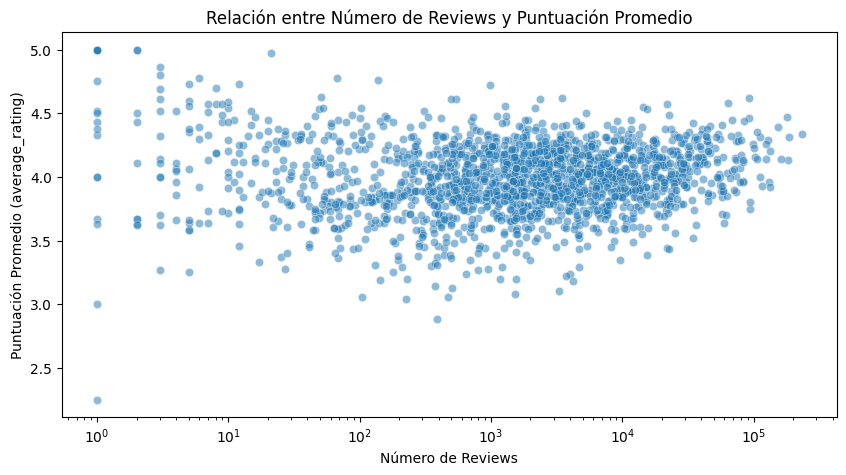

In [11]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(x=df_cleaned["num_reviews"], y=df_cleaned["average_rating"], alpha=0.5)
plt.xscale("log")  # Usar escala logarítmica
plt.xlabel("Número de Reviews")
plt.ylabel("Puntuación Promedio (average_rating)")
plt.title("Relación entre Número de Reviews y Puntuación Promedio")
plt.show()


Vamos a identificar los totales de "num_reviews" ordenados por los totales de "average_rating".  Esto nos dará una idea por cantidades del sesgo identificado anteriormente.
Vemos que la puntuación más alta solo tiene 8 "num_reviews" en total, esto es claramente un sesgeo que tenemos que tratar.

In [12]:
# Agrupar por average_rating y sumar el total de num_reviews por cada grupo
grouped_reviews = df_cleaned.groupby("average_rating")["num_reviews"].sum().reset_index()

# Ordenar los resultados por average_rating de mayor a menor
grouped_reviews = grouped_reviews.sort_values(by="average_rating", ascending=False)

print(grouped_reviews)



     average_rating  num_reviews
161            5.00            8
160            4.97           21
159            4.86            3
158            4.80            3
157            4.78           73
..              ...          ...
4              3.06          573
3              3.04          224
2              3.00            1
1              2.88          388
0              2.25            1

[162 rows x 2 columns]


El tratamiento para estos sesgos será: descartar las "average_rating" que tienen un número atípicamente bajo de "num_reviews". Esto ayuda a evitar que libros con muy pocas reseñas sesguen el análisis, ya que un average_rating de 5.0 con solo 1 o 2 reseñas no es representativo.
Vamos a tratar de identificar cuanto sería un número de reseñas bajo, para eso vamos a hacer un boxplot que muesta de manera fácil los outlier en forma de cola o puntos.

El gráfico “Distribución de num_reviews (Detección de Outliers)” muestra muchos valores atípicos extendidos a la derecha, lo que sugiere que la distribución de num_reviews es altamente sesgada (con una cola larga de valores muy altos).  
Esto significa que la distribución de los datos tiene una asimetría positiva o sesgo hacia valores muy altos, dicho de otra manera, la mayoría de los datos están agrupados en números relativamente bajos, pero hay algunos libros que tienen una cantidad exageradamente grande de reseñas, alejándose del grupo central de datos.   
En el gráfico lo vemos con una concentración de puntos a la izquierda, con un conjunto largo de puntos dispersos a la derecha, formando la “cola larga de valores muy altos”.  
Es decir que, aunque la mayoría de los libros tienen pocas reseñas (en comparación al número más alto de reseñas) algunos tienen una popularidad excepcionalmente alta, generando estos valores atípicos en la distribución.  

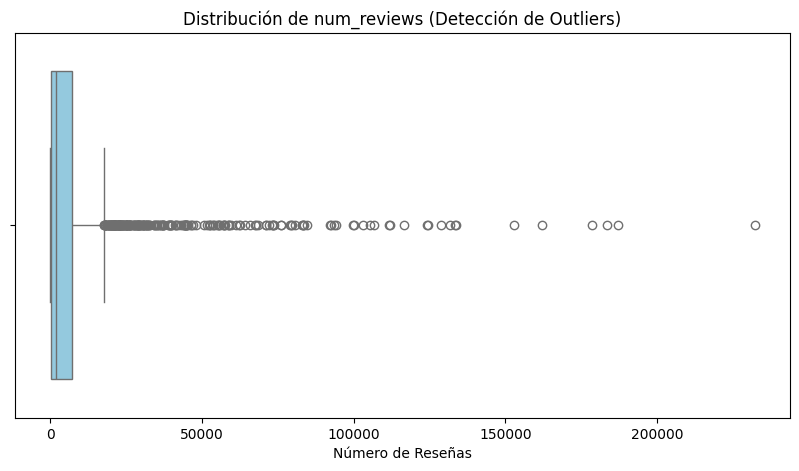

In [13]:
# Crear un boxplot para visualizar los outliers en num_reviews
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned["num_reviews"], color="skyblue")

# Título y etiquetas
plt.title("Distribución de num_reviews (Detección de Outliers)")
plt.xlabel("Número de Reseñas")

plt.show()

Para mejorar la visualización, aplicaremos una escala logarítmica para hacer más evidentes los valores relevantes.

El gráfico “Distribución de num_reviews (Escala Logarítmica)” nos indica que los outliers están principalmente en los números bajos de reviews.

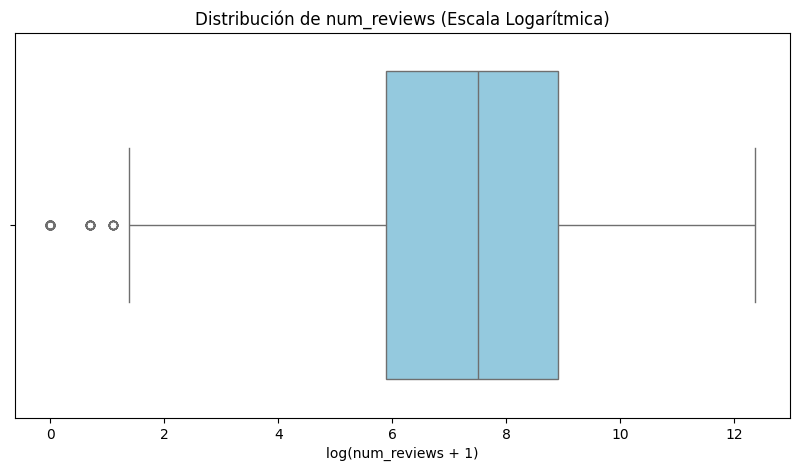

In [14]:
import numpy as np

# Crear un boxplot para visualizar los outliers en num_reviews
plt.figure(figsize=(10, 5))
sns.boxplot(x=np.log1p(df_cleaned["num_reviews"]), color="skyblue")  # log1p evita log(0)
plt.title("Distribución de num_reviews (Escala Logarítmica)")
plt.xlabel("log(num_reviews + 1)")  # +1 para evitar log(0)
plt.show()

Aquí aplicamos el método del rango intercuartil (IQR) para filtrar los valores atípicos. Al resultado filtramos los num_ratings menores de 300. ¿Por qué 300? Es un valor fijado por ajuste en cada iteración, hemos empezado en 50 y hemos ido subiendo hasta que hemos llegado a un numero que representa mejor los outlier en el boxplot.


In [15]:
# Función para eliminar outliers basados en el IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Aplicar la función a las columnas num_reviews y num_ratings
df_filtered = remove_outliers(df_cleaned, "num_reviews")
df_filtered = remove_outliers(df_filtered, "num_ratings")

# Filtrar libros con menos de un número de referencia que se ajusta por iteración
df_filtered = df_filtered[df_filtered["num_ratings"] > 300]

# Mostrar información sobre la reducción de datos
print(f"Cantidad de libros antes de eliminar outliers: {len(df_cleaned)}")
print(f"Cantidad de libros después de eliminar outliers y filtrar pocos ratings: {len(df_filtered)}")

# Ordenar por average_rating para verificar si aún hay valores altos con pocas reseñas
df_sorted_by_rating_filtered = df_filtered.sort_values(by="average_rating", ascending=False)
print(df_sorted_by_rating_filtered[["book_title", "num_ratings", "average_rating"]].head(10))




Cantidad de libros antes de eliminar outliers: 1807
Cantidad de libros después de eliminar outliers y filtrar pocos ratings: 1230
                                             book_title  num_ratings  \
82                  Master and Commander: 20 Volume Set         1318   
1                               Harry Potter Collection        34151   
720               Holy Bible: New International Version        92860   
771   J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...       139395   
599                              Grande Sertao: Veredas         5817   
1280                                   Strength to Love         4090   
867                                     Poesia completa         8995   
696                                    Les Rois maudits         2706   
1207                                  The Last Question        27755   
1098  Five Complete Hercule Poirot Novels: ABC Murde...         4514   

      average_rating  
82              4.76  
1               4.72  
720     

En el gráfico “Distribución de num_reviews” comprobamos los outliers con boxplot con un total de num_reviews, vemos una mejora en la visualización al filtrar los datos con "num_reviews" menores a 300.


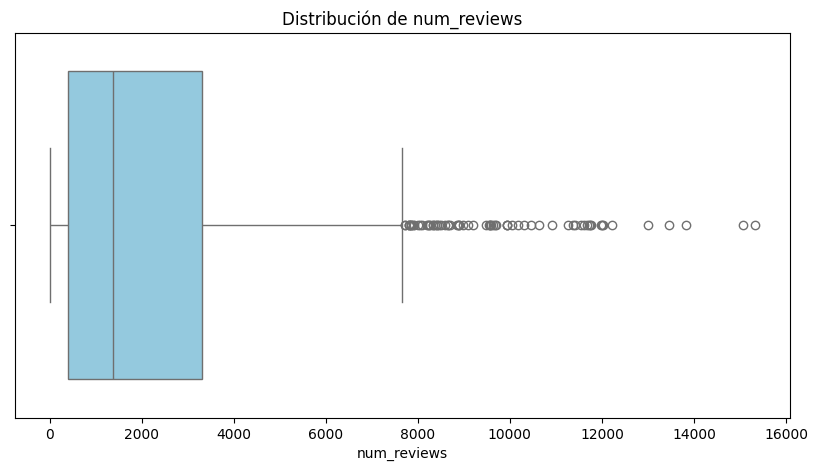

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_filtered["num_reviews"], color="skyblue")

plt.title("Distribución de num_reviews")
plt.show()

:También vemos una mejora en la visualización del gráfico boxplot de "Distribución de num_reviews (Escala Logarítmita)" ya que se aprecian los outliers a la izquierda por debajo de 3 (escala log).
Esto nos indica que el dataset "df_filtered" tiene datos representativos y que se pueden relacionar el "average_rating" con "num_reviews" sin sesgos.

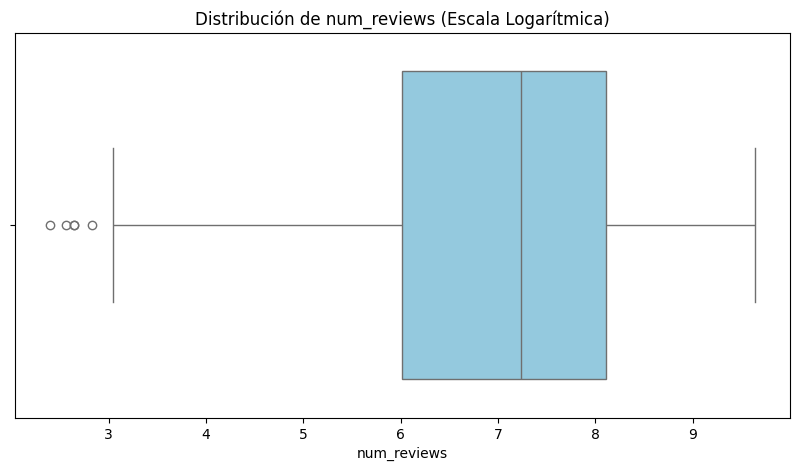

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=np.log1p(df_filtered["num_reviews"]), color="skyblue")  # log1p evita log(0)

plt.title("Distribución de num_reviews (Escala Logarítmica)")
plt.show()

Continuando con el análisis y con nuestro dataset filtrado de outlier "num_reviews", queremos comprobar si hay alguna relación entre los “average_rating” altos y “people_curr_read”, “peop_want_to_read” y “awards_count”

Primero vamos a crear una nueva columna "awards_count" que indique la cantidad de premios que tiene el libro.

Luego filtraremos los libros con “average_rating” alto, el cual fijaremos en >= 4.5.

In [18]:
# Crear una nueva columna con la cantidad de elementos en 'awards'
df_filtered["awards_count"] = df_filtered["awards"].apply(len)

# Comprobar el resultado
print(df_filtered[["awards", "awards_count"]].head())

# Filtrar libros con average_rating >= 4.5
high_rated_books = df_filtered[df_filtered["average_rating"] >= 4.5]

# Calcular estadísticas
summary = high_rated_books[["people_curr_read", "peop_want_to_read", "awards_count"]].mean()

print("Promedio de valores para libros con average_rating >= 4.5:")
print(summary)

                                              awards  awards_count
1                                                 []             2
2                                                 []             2
3                                                 []             2
4                                                 []             2
7  ['Whitbread Award for Biography (2004)', 'Nati...           139
Promedio de valores para libros con average_rating >= 4.5:
people_curr_read      3898.216759
peop_want_to_read    30270.052904
awards_count             5.750000
dtype: float64


Finalmente compararemos los valores medios de "people_curr_read", "peop_want_to_read" y la proporción de libros con premios, con un gráfico lo veremos así.

Vamos a ver si hay correlación visualmente:
En los gráficos anteriores, se podría decir que:

* Algunos libros con calificaciones alrededor de 4.0-4.5 presentan un número mayor de lectores activos, indicando que los libros bien valorados mantienen una popularidad alta y sostenida.

* La mayoría de los libros tiene menos de 100,000 personas interesadas en leerlos, aunque destacan algunos valores atípicos con calificaciones cercanas a 4.0-4.5, que despiertan gran interés con más de 300,000 personas que desean leerlos.

* Con respecto a los premios, aquí el boxplot muestra que los libros con un mayor número de premios tienden a concentrarse en calificaciones promedio entre 3.5 y 4.0, indicando que, aunque los premios reflejan reconocimiento, no necesariamente implican una calificación promedio más alta. La distribución muestra que los libros con muchos premios no destacan claramente por tener mejores puntuaciones promedio en comparación con aquellos con pocos o ningún premio.

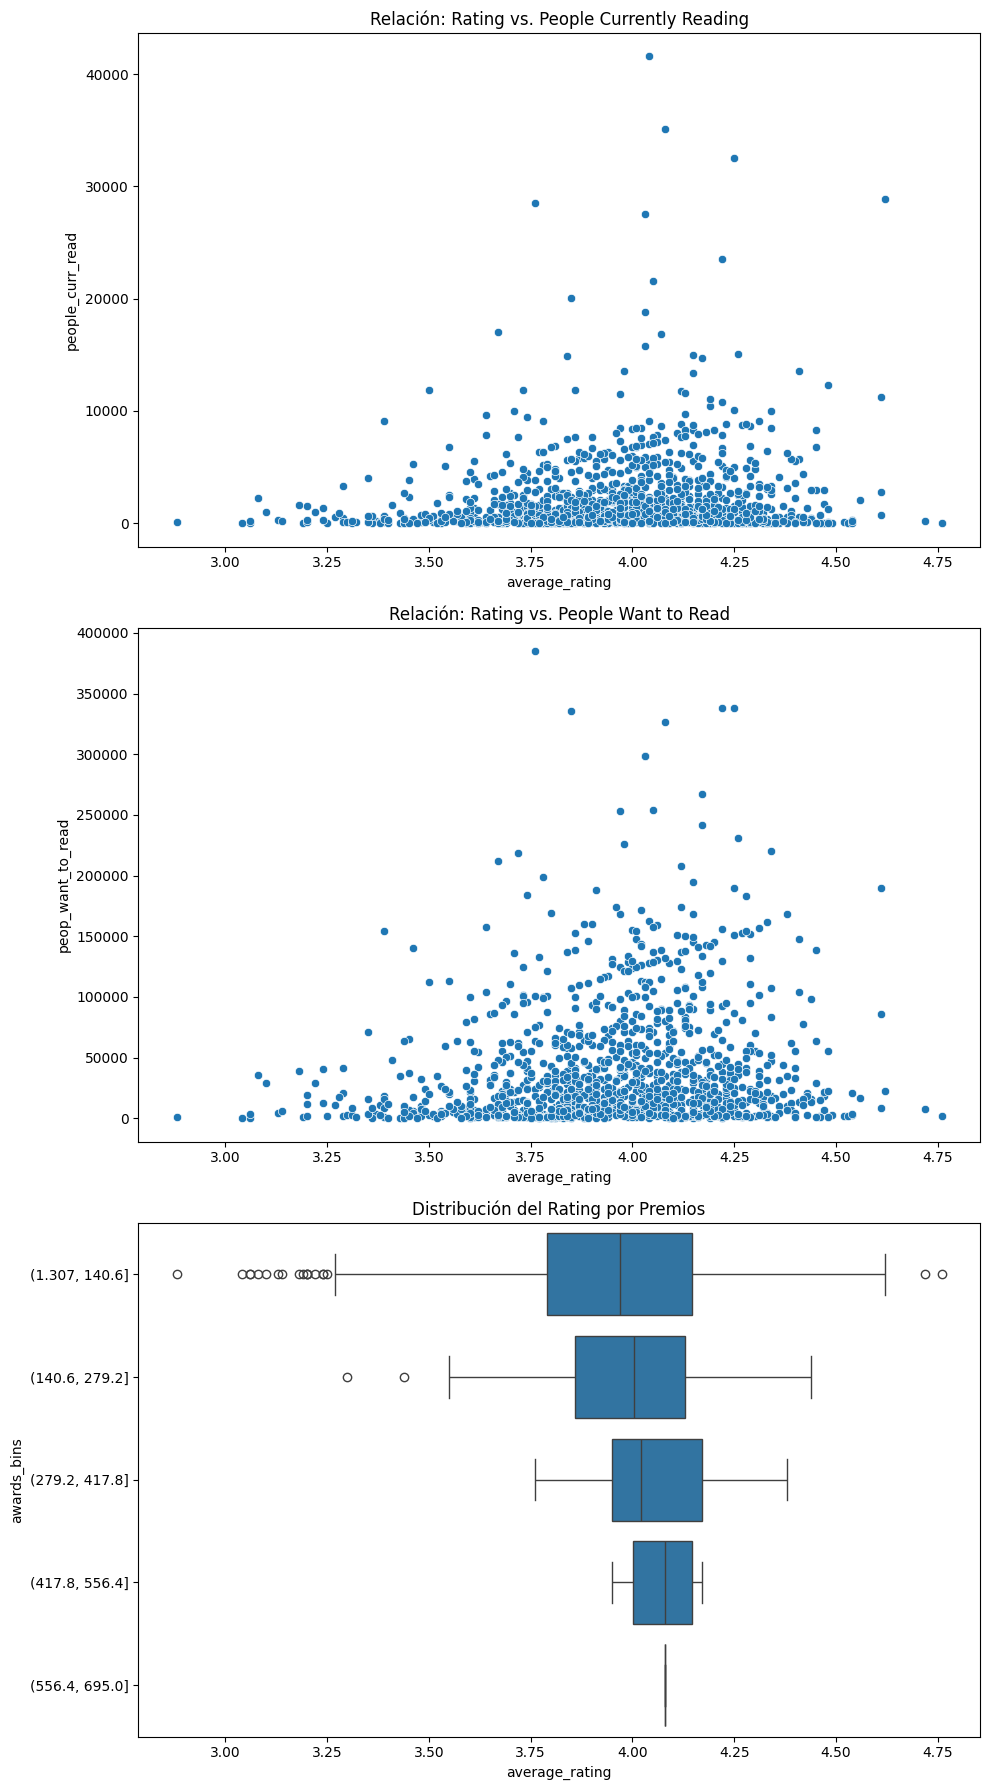

In [19]:
# Creación de una columna 'awards_bins' usando pd.cut
# Esto divide la variable continua o numérica en intervalos discretos (bins)
df_filtered['awards_bins'] = pd.cut(df_filtered['awards_count'], bins=5)

# Se crean 3 gráficos en vertical con figsize específico
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

sns.scatterplot(
    data=df_filtered,
    x="average_rating",
    y="people_curr_read",
    ax=axes[0]
)
axes[0].set_title("Relación: Rating vs. People Currently Reading")

sns.scatterplot(
    data=df_filtered,
    x="average_rating",
    y="peop_want_to_read",
    ax=axes[1]
)
axes[1].set_title("Relación: Rating vs. People Want to Read")

sns.boxplot(
    data=df_filtered,
    x="average_rating",
    y="awards_bins",
    ax=axes[2]
)
axes[2].set_title("Distribución del Rating por Premios")

# Ajuste del layout para evitar solapamiento

plt.tight_layout()
plt.show()



Ya que tenemos varias variables y algunas hipótesis vamos a crear una matriz de correlación que, mostraremos en un mapa de calor para identificar que elementos son importantes para una puntuación alta


In [20]:
correlation_matrix = df_filtered[["average_rating", "people_curr_read", "peop_want_to_read", "awards_count"]].corr()


A continuación las conclusiones del heatmap:

1. No hay una correlación fuerte entre "average_rating" y las demás variables, lo que sugiere que un libro con muchas personas leyéndolo o deseándolo no necesariamente tendrá una mejor calificación.

2. La única correlación fuerte (0.81) es entre "people_curr_read" y "peop_want_to_read", lo que indica que los libros populares suelen mantenerse en tendencia. Por lo que añadiríamos como elemento más asociado a altas puntuaciones.

2. Ganar premios "has_awards" no garantiza una mejor calificación ni mayor número de lectores (correlaciones bajas con "average_rating" y "people_curr_read").

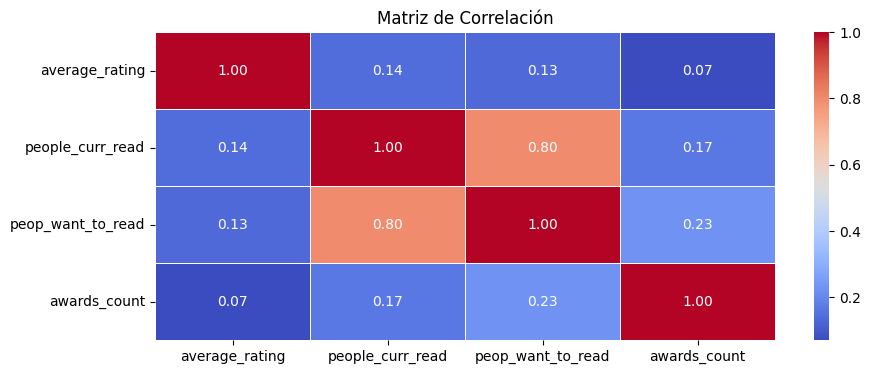

In [21]:
plt.figure(figsize=(10, 4))

# Crear un heatmap de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


In [23]:
# prompt: con el df_filtered identificar los book_title repetidos

# Find duplicate book titles in df_filtered
duplicate_titles = df_filtered[df_filtered.duplicated(subset=['book_title'], keep=False)]['book_title']
print("Duplicate book titles:"+duplicate_titles)
duplicate_titles


Series([], Name: book_title, dtype: object)


,book_title
